3. To - Do - Task
3.1 Basic Inspection and Exploration:
Problem 1 - Data Read, Write and Inspect:

1. Load the provided dataset and import in pandas DataFrame

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Week2/Datasets-20241201T065844Z-001/Datasets/bank .csv')
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB
None


 2. Check info of the DataFrame and identify following:
 (a) columns with dtypes=object
 (b) unique values of those columns.
 (c) check for the total number of null values in each column.

In [ ]:
# Task 2: Analyze the DataFrame
# (a) Identify columns with dtype=object
object_columns = df.select_dtypes(include='object').columns
print("\nColumns with dtype=object:")
print(object_columns)

# (b) Find unique values of those columns
print("\nUnique values in object columns:")
for col in object_columns:
    print(f"{col}: {df[col].unique()}")
# (c) Check for null values
print("\nTotal number of null values in each column:")
print(df.isnull().sum())


Columns with dtype=object:
Index([], dtype='object')

Unique values in object columns:

Total number of null values in each column:
age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64


In [ ]:
# Task 3: Drop object dtype columns and save the new DataFrame to a .csv file
df_numeric = df.drop(columns=object_columns)
df_numeric.to_csv('banknumericdata.csv', index=False)
print("\nNumeric DataFrame saved as 'banknumericdata.csv'!")

# Task 4: Read the new CSV and find summary statistics
df_numeric_loaded = pd.read_csv('banknumericdata.csv')
print("\nSummary statistics of numeric data:")
print(df_numeric_loaded.describe())


Numeric DataFrame saved as 'banknumericdata.csv'!

Summary statistics of numeric data:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -

 Problem 2- Data Imputations:
 • Dataset for the Task: "medical_student.csv"
 1. Load the provided dataset and import in pandas DataFrame.
 2. Check info of the DataFrame and identify column with missing (null) values.
 3. For the column with missing values fill the values using various techniques we discussed above. Try
 to explain why did you select the particular methods for particular column.
 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
 {Hint: dataset.duplicated.sum()}

In [ ]:
import pandas as pd

#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Week2/Datasets-20241201T065844Z-001/Datasets/medical_students_dataset.csv')
print(df.info())

#2   Identify columns with missing values
null = df.isnull().sum()
print(f"Null values in each column:\n{null}")

#3
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
      df[column].fillna(df[column].median(), inplace=True)

print(f"Missing values after imputation:\n{df.isnull().sum()}")

#4
duplicate = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate}")
df.drop_duplicates(inplace=True)
print(f"After removing duplicates: {df.shape}")





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None
Null values in each column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight           

<ipython-input-17-68b956c37a5b>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-17-68b956c37a5b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Missing values after imputation:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64
Number of duplicate rows: 12879
After removing duplicates: (187121, 13)


 3.2 Exercises- Data Cleaning and Transformations with ”Titanic Dataset”:

 Dataset Used: "titanic.csv"

 Problem- 1:
 Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
 Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
 median, maximum value, and minimum value of the ’Fare’ column?

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Week2/Datasets-20241201T065844Z-001/Datasets/Titanic-Dataset.csv')

# Create a subset of the DataFrame
df_subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only rows where 'Pclass' is 1
df_subset = df_subset[df_subset['Pclass'] == 1]

# Calculate statistics for the 'Fare' column
mean_fare = df_subset['Fare'].mean()
median_fare = df_subset['Fare'].median()
max_fare = df_subset['Fare'].max()
min_fare = df_subset['Fare'].min()

# Print the results
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")



Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


 Problem- 2:
 How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
 this out, drop them from your DataFrame.

In [ ]:

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Week2/Datasets-20241201T065844Z-001/Datasets/Titanic-Dataset.csv')

# Create a subset of the DataFrame
subset_df = df[['Name','Pclass','Sex','Age','Fare','Survived']]

# Retain only rows where 'Pclass' is 1
first_class_df=subset_df[subset_df['Pclass'] == 1]

# Check for null values in the 'Age' column
null_age_count=first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column: {null_age_count}")

# Drop rows with null values in the 'Age' column
firstclass_df_cleaned=first_class_df.dropna(subset=['Age'])
print("\nFirst few rows of the DataFrame after dropping null values in 'Age' column:")
print(firstclass_df_cleaned.head())





Number of null values in the 'Age' column: 30

First few rows of the DataFrame after dropping null values in 'Age' column:
                                                 Name  Pclass     Sex   Age  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                             McCarthy, Mr. Timothy J       1    male  54.0   
11                           Bonnell, Miss. Elizabeth       1  female  58.0   
23                       Sloper, Mr. William Thompson       1    male  28.0   

       Fare  Survived  
1   71.2833         1  
3   53.1000         1  
6   51.8625         0  
11  26.5500         1  
23  35.5000         1  


Problem- 3:
 The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka
tion:
 • ’C’ for Cherbourg
 • ’Q’ for Queenstown
 • ’S’ for Southampton

 Task:
 1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
 ’Embarked Q’, ’Embarked S’).
  2. Add these new columns to the original DataFrame.
 3. Drop the original ’Embarked’ column.
 4. Print the first few rows of the modified DataFrame to verify the changes.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Week2/Datasets-20241201T065844Z-001/Datasets/Titanic-Dataset.csv')
# Step 1: Use one-hot encoding to convert the 'Embarked' column
one_hot_encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Step 2: Add the new binary columns to the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Step 3: Drop the original 'Embarked' column
df.drop(columns=['Embarked'], inplace=True)

# Step 4: Print the first few rows of the modified DataFrame
print("Modified DataFrame:")
print(df.head())





Modified DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       

 Problem- 4:
 Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual
ization to show how the survival distributions vary by gender.

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-35-0399c9dc8a76>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='viridis')
<ipython-input-35-0399c9dc8a76>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='viridis')


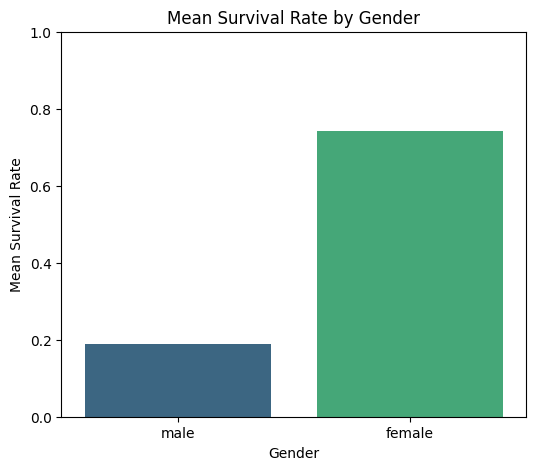

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Week2/Datasets-20241201T065844Z-001/Datasets/Titanic-Dataset.csv')

# Step 1: Calculate the mean survival rates for different groups in the 'Sex' column
mean_survival_rates = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(mean_survival_rates)

# Step 2: Visualize the survival distributions by gender
plt.figure(figsize=(6, 5))
sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='viridis')
plt.title('Mean Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

 Problem- 5:
 Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

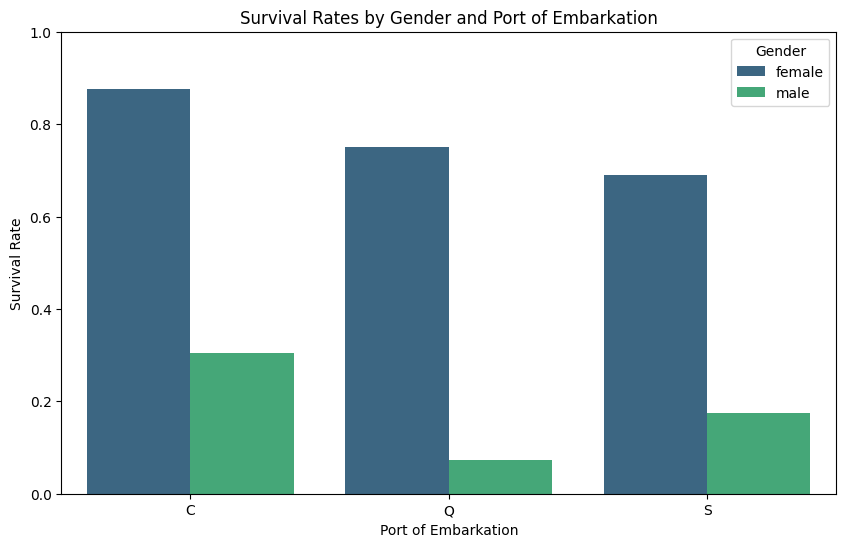

In [ ]:
import pandas as pd
import matplotlib.pyplot
import seaborn as sns


# Load the Titanic dataset
df = pd.read_csv('/content/drive/MyDrive/Week2/Datasets-20241201T065844Z-001/Datasets/Titanic-Dataset.csv')

# Step 1: Calculate survival rates grouped by 'Sex' and 'Embarked'
survival_rates = df.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()

# Step 2: Visualization - Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=survival_rates, palette='viridis')
plt.title('Survival Rates by Gender and Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.show()